In [1]:
using CSV
using Dates
using DataFrames
using Gadfly

In [2]:
ENV["COLUMNS"] = 1000;

In [3]:
data = DataFrame(CSV.File("../rawdata/output_HHS_US_2021-03-01_one_column.csv"))
filter!(row -> ismissing(row["hospitalization_2021-03-02"]), data);
data

,Column1,hospital_name,ccn,collection_week,fips_code,hospitalization_percentage,ICU_percentages,hospitalization_2021-03-02,target_date,hospitalizations
,Int64,String,String?,Date,Float64,Float64?,Float64?,Float64?,Date,Float64?
1,623,Santa Paula Hospital,missing,2021-02-19,6111.0,missing,0.4375,missing,2021-03-01,missing
2,1803,Prairieville Family Hospital,missing,2021-02-19,22005.0,missing,missing,missing,2021-03-01,missing
3,3446,INTEGRIS Community Hospital - Del City,missing,2021-02-19,40109.0,missing,0.0,missing,2021-03-01,missing
4,4020,Legent Hospital for Special Surgery (FKA Star Medical Center),missing,2021-02-19,48085.0,missing,missing,missing,2021-03-01,missing
5,10,PRATTVILLE BAPTIST HOSPITAL,missing,2021-02-19,1001.0,1.0,0.21875,missing,2021-03-03,1.71656
6,11,NORTH BALDWIN INFIRMARY,missing,2021-02-19,1003.0,0.160221,0.0526316,missing,2021-03-03,0.661575
7,12,SOUTH BALDWIN REGIONAL MEDICAL CENTER,missing,2021-02-19,1003.0,0.329912,0.370787,missing,2021-03-03,1.36226
8,13,THOMAS HOSPITAL,missing,2021-02-19,1003.0,0.509867,0.337209,missing,2021-03-03,2.10532
9,14,MEDICAL CENTER BARBOUR,missing,2021-02-19,1005.0,1.0,0.684211,missing,2021-03-03,0.510375


In [4]:
mean(xs) = sum(xs) / length(xs);

In [5]:
isbad(x) = isnothing(x) || ismissing(x) || isinf(x) || isnan(x);
skipbad(xs) = filter(x -> !isbad(x), xs);

In [6]:
sum_vals(xs) = sum(skipbad(xs));
mean_vals(xs) = mean(skipbad(xs));

In [7]:
data_total = combine(groupby(data, :target_date), [
    "hospitalizations" => sum_vals => :admissions,
    :ICU_percentages => mean_vals => :icu_pct,
    :hospitalization_percentage => mean_vals => :hosp_pct,
])

,target_date,admissions,icu_pct,hosp_pct
,Date,Float64,Float64,Float64
1,2021-03-01,0.0,0.21875,NaN
2,2021-03-03,4972.67,0.226312,0.423925
3,2021-03-04,4870.55,0.226312,0.423925
4,2021-03-05,4819.09,0.226312,0.423925
5,2021-03-06,4600.76,0.226312,0.423925
6,2021-03-07,4420.28,0.226312,0.423925
7,2021-03-08,4475.23,0.226312,0.423925
8,2021-03-09,4377.54,0.226312,0.423925
9,2021-03-10,4351.91,0.226312,0.423925


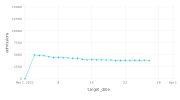

In [8]:
plot(
    data_total,
    x = :target_date,
    y = :admissions,
    Geom.point, Geom.line,
    Coord.cartesian(ymin=0),
    Scale.y_continuous(format=:plain),
    Guide.yticks(ticks=0:2500:15000),
) |> SVG(18cm, 10cm)